In [1]:
!pip install --pre pycaret


In [2]:
!pip install interpret


In [47]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 5.6 MB/s eta 0:00:00m eta 0:00:010:01:01m


In [49]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 5.5 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00


In [3]:
from pycaret.utils import version
version()

'3.0.0.rc4'

In [4]:
# ----------------------------------GENERAL---------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

from IPython.display import Image # I-Python For allowing user to display images in notebooks
import seaborn as sns # Visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import scikitplot as skplt
import matplotlib.pyplot as plt # Importation of pyplot sub-library from Matplotlib library

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.model_selection import train_test_split # Importation of Scikit-Learn library focused on Train Test Split method;
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PowerTransformer # Will make the probability distribution of a variable more Gaussian-like
from sklearn.preprocessing import RobustScaler
from sklearn.inspection import permutation_importance # Permutation Importance for feature selection approach
from sklearn.feature_selection import SelectKBest, f_classif # Select K best features for feature selection approach

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score # Cross-Validation score
from sklearn.model_selection import cross_val_predict # Cross-Validation prediction
from sklearn.neighbors import KNeighborsClassifier # KNN for classification approach
from sklearn.naive_bayes import GaussianNB # NaiveBayes for classification approach - Gaussian
from sklearn.naive_bayes import BernoulliNB # NaiveBayes for classification approach - Bernouilli
from sklearn.svm import SVC # SVM with Radial Basis Function for classification approach
from sklearn.svm import LinearSVC # SVM Linear Kernel Support Vector for classification approach
from xgboost import XGBClassifier # XGBoost for classification approach
from catboost import CatBoostClassifier # CatBoost for classification approach
from sklearn.ensemble import RandomForestClassifier #  RandomForest for classification approach
from sklearn.ensemble import AdaBoostClassifier # AsaBoost for classification approach

plt.rcParams["figure.figsize"] = (10, 10)  # Change matplotlib Box Size
plt.rcParams["font.size"] = 14  # Change matplotlib Font Size
plt.style.use("fivethirtyeight")

In [25]:
df_events = pd.read_csv('/Users/rajendravrk/Olympic_Athletes_2022/Olympic_Athletes_2022/data/athlete_events.csv')
#df_noc = pd.read_csv('athlete_events.csv')

In [26]:
df_events.head(15)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [7]:
df_events['Height'].value_counts()

180.0    12492
170.0    11976
178.0    10708
175.0    10320
183.0     8284
         ...  
226.0        3
131.0        2
130.0        2
219.0        2
128.0        1
Name: Height, Length: 95, dtype: int64

In [9]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [88]:
cleaned_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


and helpful abbreviations of NOC 

'SGP', 'Singapore'

'ROT', 'Refugee Olympic Athletes'

'UNK', 'Unknown'

'TUV', 'Tuvalu'

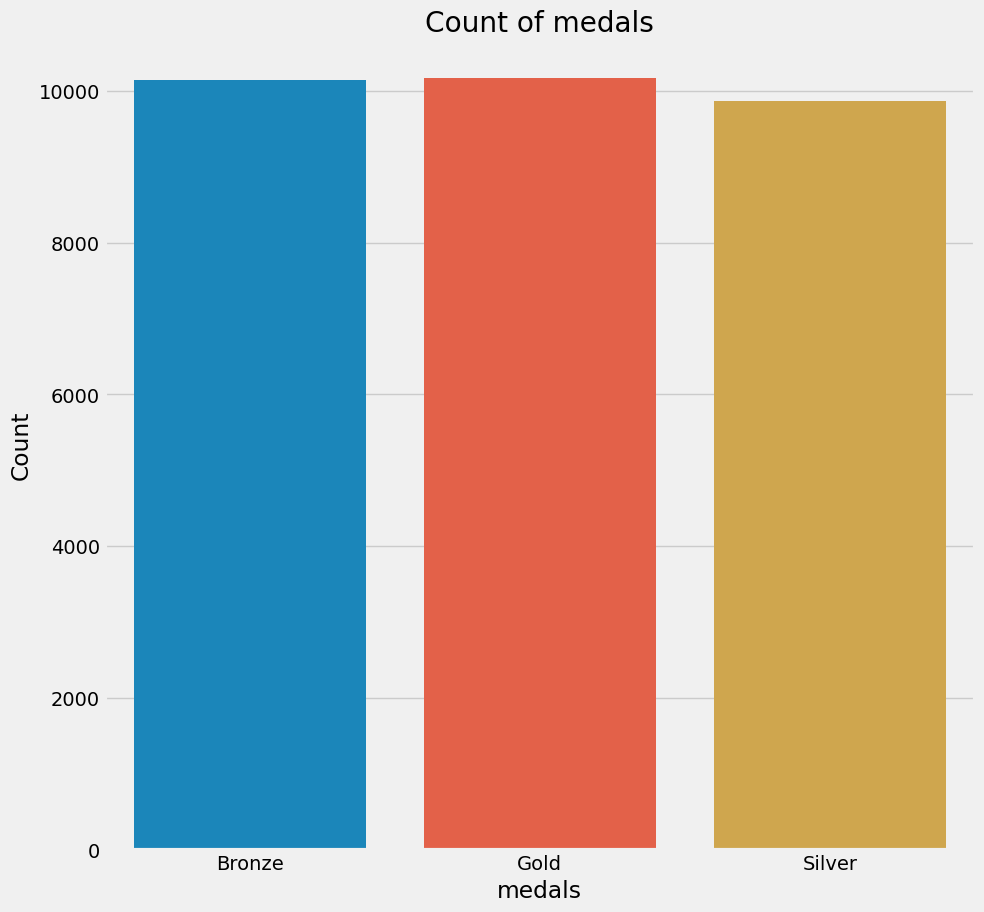

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Count of medals')
sns.countplot(x=cleaned_df['Medal'])
plt.xlabel('medals')
plt.ylabel('Count')
plt.show()

In [13]:



'''fig, ax = plt.subplots(2,1,figsize = (20, 10))
ax[0].boxplot(cleaned_df.iloc[:,0:17])
ax[1].boxplot(cleaned_df.iloc[:,17:34])
plt.show()'''

'fig, ax = plt.subplots(2,1,figsize = (20, 10))\nax[0].boxplot(cleaned_df.iloc[:,0:17])\nax[1].boxplot(cleaned_df.iloc[:,17:34])\nplt.show()'

In [40]:
cleaned_df= df_events.copy(deep = True)

In [41]:
cleaned_df['Medal'] = cleaned_df['Medal'].fillna("no win")

In [42]:
cleaned_df=cleaned_df.replace({'Medal' : { 'Gold' : 1, 'Bronze' : 1, 'Silver' : 1, 'no win':0 }})

In [43]:
cleaned_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,0


In [44]:
cleaned_df=cleaned_df.dropna()
cleaned_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0


In [45]:
cleaned_df['Medal'].value_counts()

0    175984
1     30181
Name: Medal, dtype: int64

In [9]:
cleaned_df['Year'] = cleaned_df['Year'].astype(str)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  object 
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
 15  status  30181 non-null  int64  
dtypes: float64(3), int64(2), object(11)
memory usage: 3.9+ MB


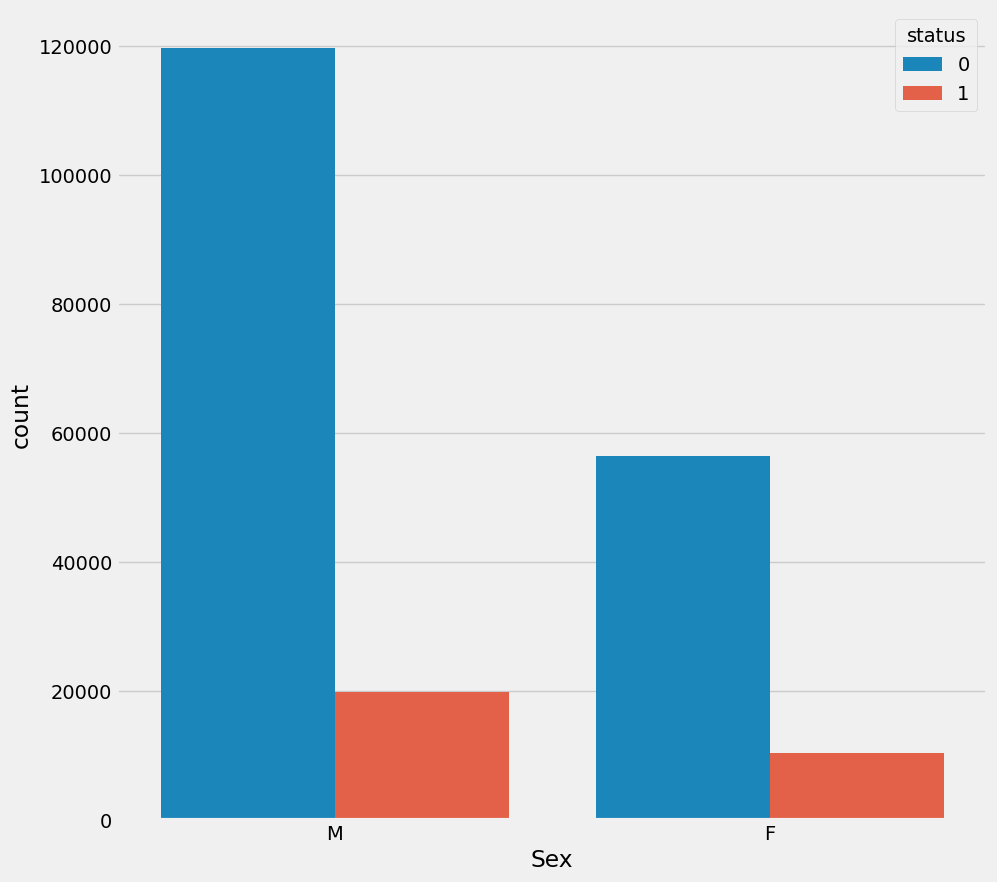

In [17]:
sns.countplot(x ='Sex', hue = "status", data = cleaned_df)
# Show the plot
plt.show()

<AxesSubplot: xlabel='Height'>

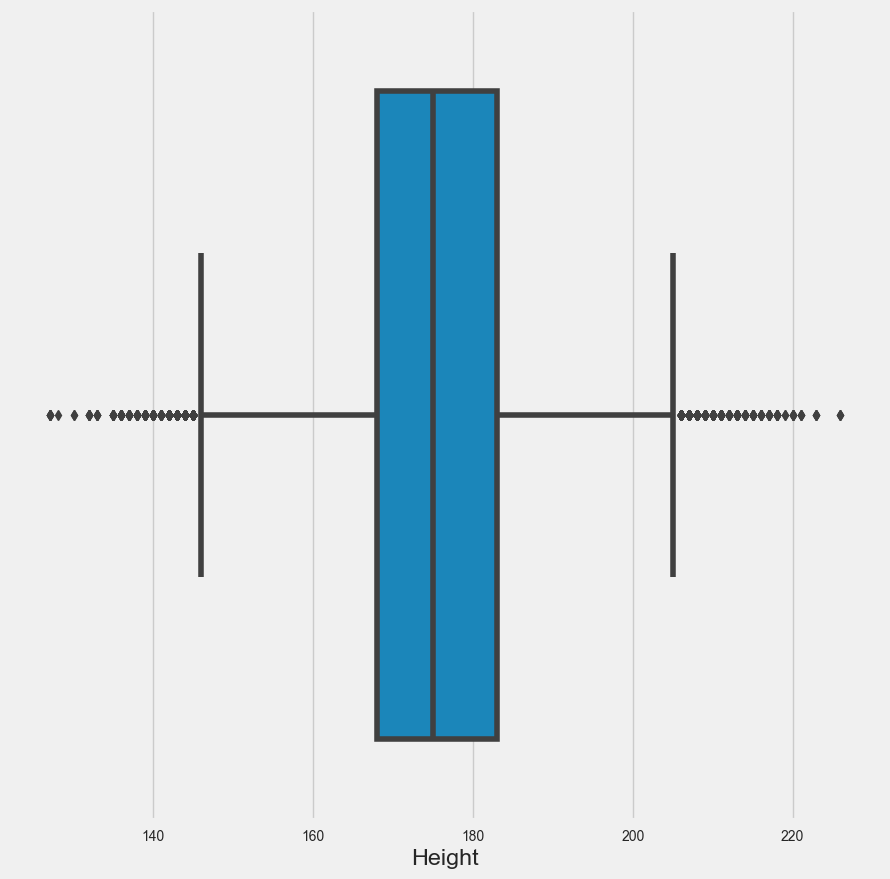

In [145]:
sns.boxplot(cleaned_df['Height'])

<AxesSubplot: xlabel='Age'>

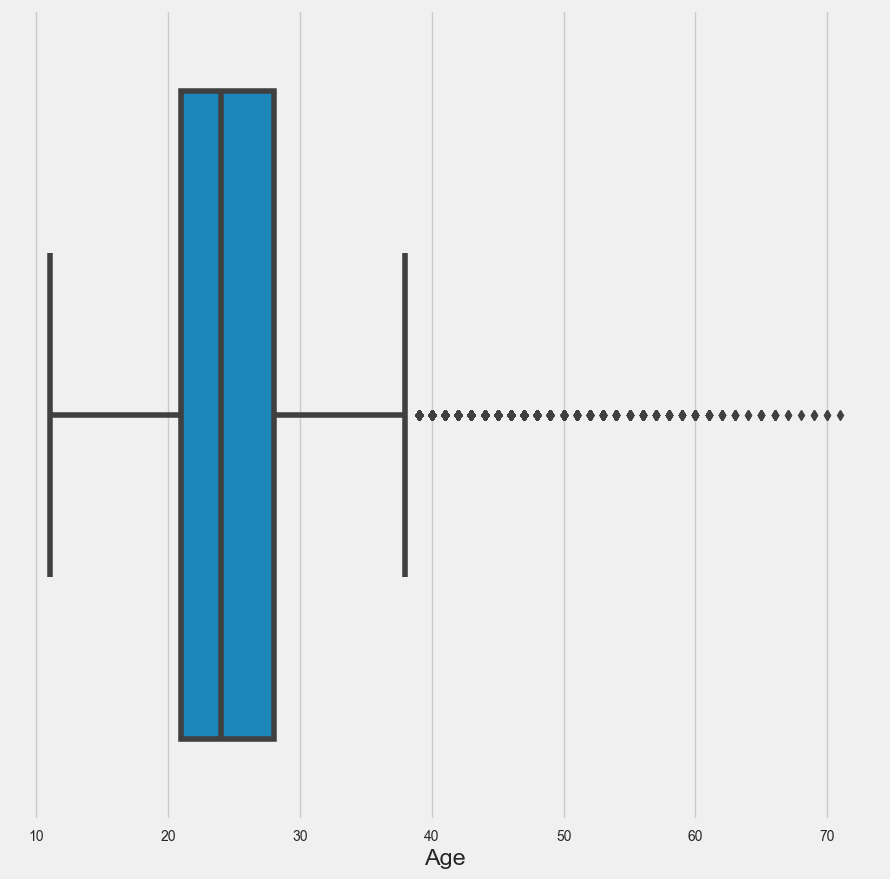

In [146]:
sns.boxplot(cleaned_df['Age'])

In [32]:
cleaned_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,status
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,0


### Prepare Datasets

In [46]:
X = cleaned_df.drop(columns=['Medal','Name','ID','NOC','Games','Year'], axis=1)
y = cleaned_df['Medal']
X.shape, y.shape

((206165, 9), (206165,))

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape

((164932, 9), (41233, 9), (164932,))

In [12]:
X_train.select_dtypes(include=["object"]).apply(lambda col: len(col.unique()))


Sex         2
Team      249
Year       35
Season      2
City       42
Sport      55
Event     559
dtype: int64

In [23]:
X_train['Team'].value_counts(normalize=True).head(20)


United States    0.066076
France           0.037713
Canada           0.037082
Great Britain    0.036633
Italy            0.035851
Japan            0.035693
Germany          0.034190
Australia        0.031910
Poland           0.027429
Sweden           0.025483
Soviet Union     0.023082
China            0.022894
Hungary          0.022518
Russia           0.022500
Finland          0.021312
Spain            0.020718
Switzerland      0.019141
South Korea      0.018165
Netherlands      0.017813
Romania          0.016419
Name: Team, dtype: float64

In [24]:
X_train['NOC'].value_counts(normalize=True).head(20)


USA    0.068513
FRA    0.038592
CAN    0.038464
GBR    0.037876
ITA    0.037106
JPN    0.036421
GER    0.035633
AUS    0.032456
POL    0.027757
SWE    0.025817
CHN    0.023773
URS    0.023658
RUS    0.023482
HUN    0.022609
FIN    0.021427
ESP    0.021021
SUI    0.020117
KOR    0.018668
NED    0.018013
ROU    0.016680
Name: NOC, dtype: float64

In [43]:
from pycaret.classification import *

reg = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'status',
            session_id=13,
            max_encoding_ohe=600, # columns with 600 or less categories will be One-hot encoded ELSE target encoding
            rare_to_value=0.0001, # Categories with less than 0.008 of the data will be grouped into a new category (Other)
            rare_value='Other',
            experiment_name='olympics',
            n_jobs=-1)

,Description,Value
0,Session id,13
1,Target,status
2,Target type,Binary
3,Original data shape,"(164932, 11)"
4,Transformed data shape,"(164932, 896)"
5,Transformed train set shape,"(115452, 896)"
6,Transformed test set shape,"(49480, 896)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,7


In [ ]:
best_model = compare_models(fold=5, sort='F1')


In [59]:
cleaned_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,status
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0,0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0,0


Series([], Name: Team, dtype: object)

In [93]:
cleaned_df['Team'] = cleaned_df['Team'].apply(lambda x: 'Germany' if x == 'West Germany' else x)


In [94]:
cleaned_df['Team'] = cleaned_df['Team'].apply(lambda x: 'Germany' if x == 'East Germany' else x)


In [96]:
cleaned_dfcleaned_df['Team'].value_counts() == 1

United States                          13714
Germany                                12667
France                                  7807
Canada                                  7668
Great Britain                           7499
                                       ...  
Leipzig                                    1
St. Louis Southwest Turnverein #2-3        1
Turnverein Vorwrts, Cleveland              1
Paula                                      1
Digby                                      1
Name: Team, Length: 658, dtype: int64

In [97]:
cleaned_df['NOC'].value_counts()

USA    14214
FRA     7977
CAN     7965
GBR     7766
ITA     7697
       ...  
SAA        3
SSD        3
YMD        2
UAR        1
NFL        1
Name: NOC, Length: 226, dtype: int64

## To prepare list of medals per country

In [100]:
medals_df = cleaned_df[cleaned_df['status']==1]

In [108]:
total_medals = medals_df.groupby(by=['Medal','NOC']).agg({'NOC' : 'count'}).rename(columns={'NOC': 'medals'})

In [109]:
total_medals

medals
Medal  NOC        
Bronze AFG       2
       ALG       6
       ANZ       3
       ARG      78
       ARM       8
...            ...
Silver VEN       3
       VIE       3
       YUG     116
       ZAM       1
       ZIM       4

[346 rows x 1 columns]

In [118]:
#pivot_table = total_medals.pivot( columns='Medal', values='medals')
table = pd.pivot_table(total_medals, values='medals', index=['NOC'],
                    columns=['Medal'],fill_value=0)

In [125]:
table.reset_index()

Medal,NOC,Bronze,Gold,Silver
0,AFG,2,0,0
1,ALG,6,5,4
2,ANZ,3,0,1
3,ARG,78,72,70
4,ARM,8,2,5
...,...,...,...,...
138,VIE,0,1,3
139,WIF,5,0,0
140,YUG,83,122,116
141,ZAM,0,0,1


In [132]:
table['total'] = table['Bronze']+table['Gold']+table['Silver']

In [135]:
table_medals=table.sort_values(by=['total'],ascending= False)

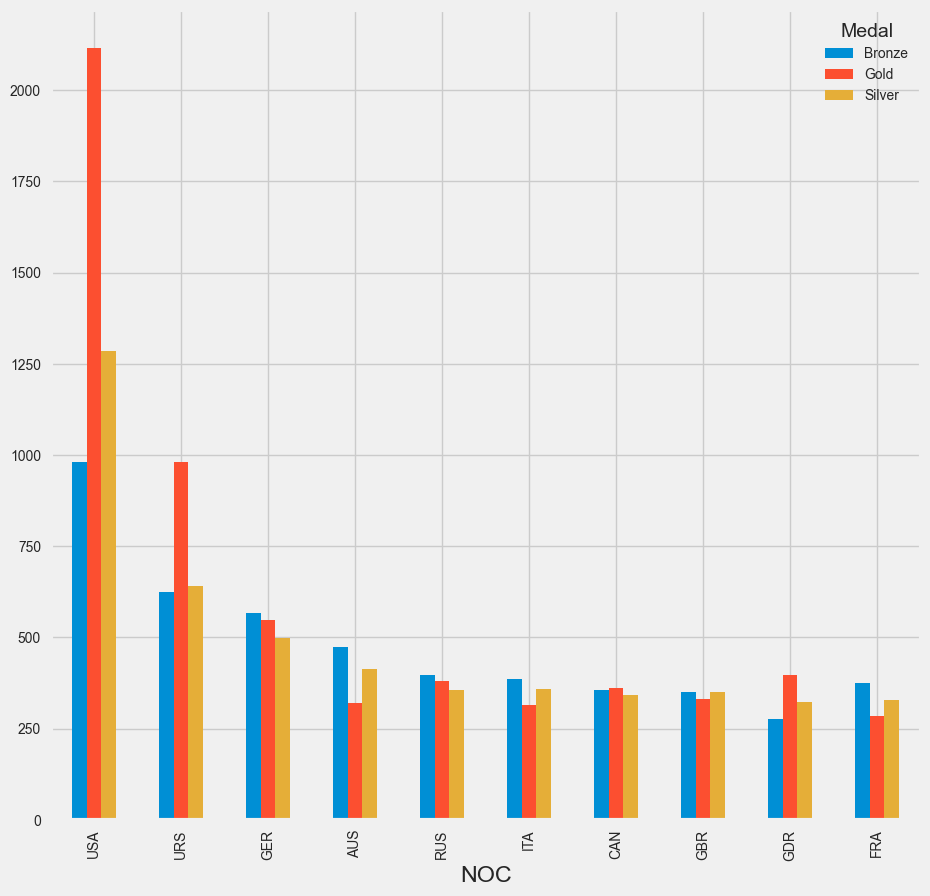

In [162]:
#plt.title('Total Count of medals per country')
table_medals.iloc[:10,:3].plot(kind='bar');


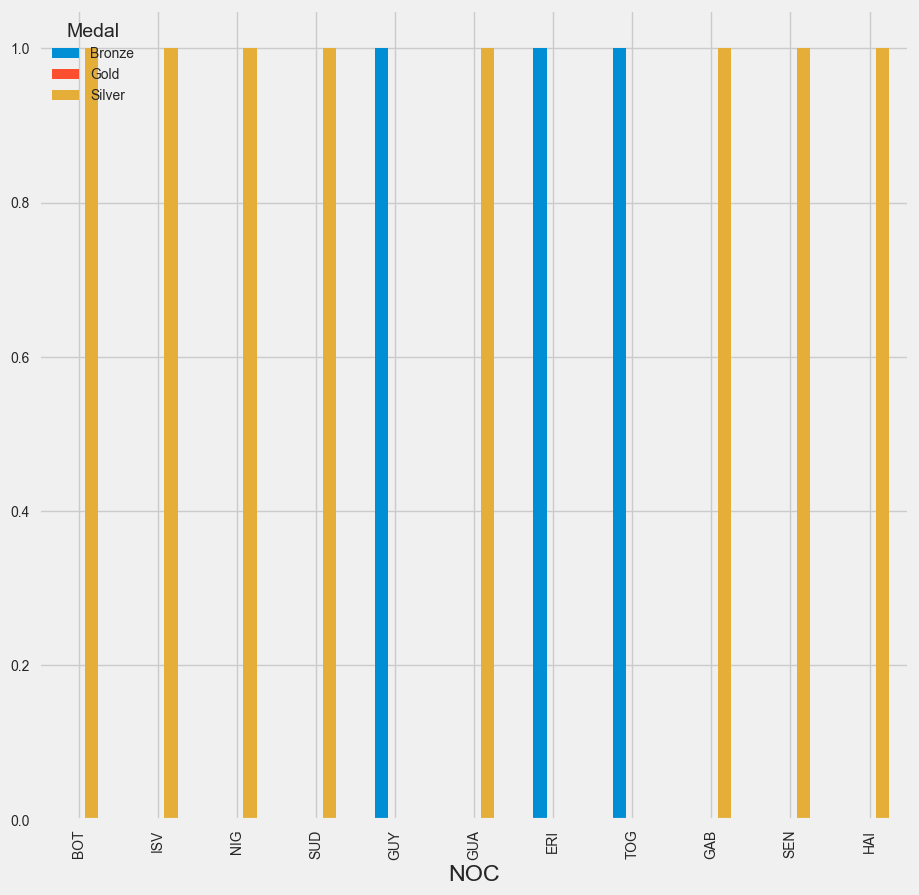

In [140]:
table_medals.iloc[132:,:3].plot(kind='bar');


## Aged medal winners

In [153]:
outliers_age = cleaned_df[(cleaned_df['Age']<18.0) | (cleaned_df['Age']>40.0)]

In [155]:
outliers_age=cleaned_df.sort_values(by=['Age'],ascending= False)

In [159]:
outliers_age_winners=outliers_age[outliers_age['status']==1]

In [160]:
outliers_age_winners.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,status
173379,87135,Louis Noverraz,M,66.0,179.0,78.0,Switzerland,SUI,1968 Summer,1968,Summer,Mexico City,Sailing,Sailing Mixed 5.5 metres,Silver,1
205274,103070,"James William George ""Bill"" Roycroft",M,61.0,188.0,72.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Bronze,1
159095,79855,Ian Millar,M,61.0,185.0,76.0,Canada,CAN,2008 Summer,2008,Summer,Beijing,Equestrianism,"Equestrianism Mixed Jumping, Team",Silver,1
239572,120060,Lars Einar Vilhelm Thrn,M,60.0,175.0,70.0,Rush VII,SWE,1964 Summer,1964,Summer,Tokyo,Sailing,Sailing Mixed 5.5 metres,Silver,1
169085,84997,Josef Carl Peter Neckermann,M,60.0,183.0,65.0,Germany,FRG,1972 Summer,1972,Summer,Munich,Equestrianism,"Equestrianism Mixed Dressage, Team",Silver,1


### **Baseline TRAINING Models:** K-Nearest Neighbours (KNN)

In [51]:
# Model Call:
knn = KNeighborsClassifier(n_neighbors=35)
# Pipeline Definition:
knn_pipe = Pipeline(steps=[("PT", PowerTransformer()), ("knn", knn)])

In [56]:
'''knn_score_TRAIN_set = np.mean(cross_val_score(knn_pipe, X_train, y_train, scoring="f1_macro", cv=4))
print("\nf1_macro Score obtained for TRAIN set is: %.2f%%" % (knn_score_TRAIN_set * 100.0))'''

'knn_score_TRAIN_set = np.mean(cross_val_score(knn_pipe, X_train, y_train, scoring="f1_macro", cv=4))\nprint("\nf1_macro Score obtained for TRAIN set is: %.2f%%" % (knn_score_TRAIN_set * 100.0))'

In [58]:
X_train.head()

,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event
144064,M,21.0,170.0,57.0,Norway,1960,Winter,Squaw Valley,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres
9494,M,23.0,186.0,82.0,Soviet Union,1976,Summer,Montreal,Rowing,Rowing Men's Coxless Fours
142664,M,38.0,173.0,85.0,Germany,1960,Summer,Roma,Shooting,"Shooting Men's Free Pistol, 50 metres"
81949,F,30.0,177.0,58.0,Mexico,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay
120202,F,18.0,169.0,58.0,Hungary,1972,Summer,Munich,Swimming,Swimming Women's 200 metres Individual Medley


In [163]:
!pip install imblearn --ignore-installed

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 2.3 MB/s eta 0:00:00m eta 0:00:01
  Using cached scikit_learn-1.2.0-cp310-cp310-macosx_10_9_x86_64.whl (9.0 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached scipy-1.9.3-cp310-cp310-macosx_10_9_x86_64.whl (34.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.13.4 requires numpy<1.23,>=1.21.0, but you have numpy 1.23.5 which is incompatible.
sktime 0.13.4 requires scikit-learn<1.2.0,>=0.24.0, but you have scikit-learn 1.2.0 which is incompatible.
sktime 0.13.4 requires scipy<1.9.0, but you have scipy 1.9.3 which is incompatible.
pycaret 3.0.0rc4 requires

In [13]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

((30181, 9), (30181,))

1    30181
Name: status, dtype: int64

In [18]:
cleaned_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,status
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,1
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,1
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,1
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,1
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,1
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,1
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,1
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,1


__Train and test split__

__Resampling RandomUnderSampler__

In [49]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [50]:
pd.Series(y_train_rus).value_counts()

0    24138
1    24138
Name: Medal, dtype: int64

__Pipeline__

<span style="color:orange"> **Before running our Models, we first want to prepare our data.**</span> <br>

<span style="color:green"> **Categorical data:** One hot encoding</span> <br>
<span style="color:green"> **Continuous:** Standard scaling</span> 

<span style="color:orange"> **We then put everything together using the build in sklearn function called ColumnTransformer**</span>

In [186]:
cleaned_df = cleaned_df.drop(columns = ['Team_Single'],axis=1)

In [187]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206165 non-null  int64  
 1   Name    206165 non-null  object 
 2   Sex     206165 non-null  object 
 3   Age     206165 non-null  float64
 4   Height  206165 non-null  float64
 5   Weight  206165 non-null  float64
 6   Team    206165 non-null  object 
 7   NOC     206165 non-null  object 
 8   Games   206165 non-null  object 
 9   Year    206165 non-null  object 
 10  Season  206165 non-null  object 
 11  City    206165 non-null  object 
 12  Sport   206165 non-null  object 
 13  Event   206165 non-null  object 
 14  Medal   206165 non-null  object 
 15  status  206165 non-null  int64  
dtypes: float64(3), int64(2), object(11)
memory usage: 26.7+ MB


In [51]:
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features, numeric_features

(['Sex', 'Team', 'Season', 'City', 'Sport', 'Event'],
 ['Age', 'Height', 'Weight'])

In [52]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())])

categorical_transformer = Pipeline(
    steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers = [("num", numeric_transformer, numeric_features),
                    ("cat", categorical_transformer, categorical_features)])

<span style="color:orange"> **Let's run different models and evaluate them.**</span>

__RandomForestClassifier__

In [53]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, random_state=42)

pipeline_rfc = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", rfc)])

In [ ]:

pipeline_rfc.fit(X_train_rus, y_train_rus)

pred_rfc = pipeline_rfc.predict(X_test)


In [191]:
scores=[]
scores.append(f1_score(y_test, pred_rfc))

In [192]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     35190
           1       0.42      0.80      0.55      6043

    accuracy                           0.81     41233
   macro avg       0.69      0.81      0.71     41233
weighted avg       0.88      0.81      0.83     41233



In [ ]:
from sklearn import metrics
acc_rf = round( metrics.accuracy_score(y_test, pred_rfc) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

__Naive Bayes__

In [193]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()

pipeline_nb = Pipeline([("col_transformer", preprocessor), 
                            ("estimator", nb)])


In [194]:
pipeline_nb.fit(X_train_rus, y_train_rus)

pred_nb = pipeline_nb.predict(X_test)
scores.append(f1_score(y_test, pred_nb))

In [195]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79     35190
           1       0.27      0.69      0.39      6043

    accuracy                           0.69     41233
   macro avg       0.60      0.69      0.59     41233
weighted avg       0.83      0.69      0.73     41233



__Decision Tree__

In [196]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=42, splitter='best')

In [198]:
pipeline_dtree = Pipeline([("pre_process", preprocessor), 
                         ("model", dtree)])
pipeline_dtree

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Age', 'Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('onehot',
                                                                   OneHotEncod...
                                                   'City', 'Sport', 'Event'])],
                                   verbose=False,
                                   verbose_feature_names_out=True)),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=42, splitter='best'))],
         verbose=False)

In [199]:
pipeline_dtree.fit(X_train, y_train)
y_pred = pipeline_dtree.predict(X_test)

class_labels = pipeline_dtree.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=class_labels, index=class_labels)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     35190
           1       0.66      0.66      0.66      6043

    accuracy                           0.90     41233
   macro avg       0.80      0.80      0.80     41233
weighted avg       0.90      0.90      0.90     41233



,0,1
0,33195,1995
1,2084,3959


## Hyperparameter Optimization


In [56]:
 pipeline_rfc.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'col_transformer', 'estimator', 'col_transformer__n_jobs', 'col_transformer__remainder', 'col_transformer__sparse_threshold', 'col_transformer__transformer_weights', 'col_transformer__transformers', 'col_transformer__verbose', 'col_transformer__verbose_feature_names_out', 'col_transformer__num', 'col_transformer__cat', 'col_transformer__num__memory', 'col_transformer__num__steps', 'col_transformer__num__verbose', 'col_transformer__num__scaler', 'col_transformer__num__scaler__copy', 'col_transformer__num__scaler__with_mean', 'col_transformer__num__scaler__with_std', 'col_transformer__cat__memory', 'col_transformer__cat__steps', 'col_transformer__cat__verbose', 'col_transformer__cat__onehot', 'col_transformer__cat__onehot__categories', 'col_transformer__cat__onehot__drop', 'col_transformer__cat__onehot__dtype', 'col_transformer__cat__onehot__handle_unknown', 'col_transformer__cat__onehot__max_categories', 'col_transformer__cat__onehot__min_frequen

In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
parameters = {'estimator__max_features': ['log2', 'sqrt', None, 0.8], 
              'estimator__criterion': ['entropy', 'gini'],
              'estimator__max_depth': [2, 3, 5, 10, 50], 
              'estimator__min_samples_split': [2, 3, 50, 100],
              'estimator__min_samples_leaf': [1, 5, 8, 10]
             }

# Run the grid search
grid_obj = GridSearchCV(pipeline_rfc, parameters, cv=5)
grid_obj = grid_obj.fit(X_train_rus, y_train_rus)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train_rus, y_train_rus)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

In [ ]:
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

In [ ]:
plot_model(tuned_bestmodel, plot='feature')
